# Caso vacío con pared dieléctrica


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact

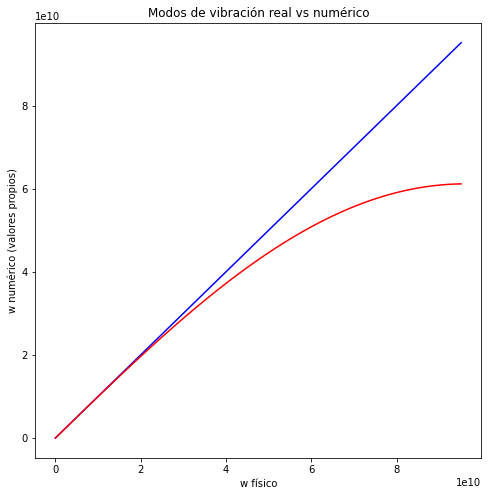

<ipython-input-2-78962cd075c2>:5: RuntimeWarning: divide by zero encountered in true_divide
  err_k_p=(err_k/n2)*100


Ingrese el error aceptable para el método: 1


In [ ]:
%run Cavidad_aire_FDFD_1D_C.F.Cero.ipynb

In [ ]:
w=2*np.pi*fnum
w

In [ ]:
PPW = 10

In [ ]:
a = 0
b = 1                    # (Cavidad de 1 metro)
L = b-a                  # Tamaño cavidad

fmax = 3e9 

e0 = 8.8541878176e-12    #Permitividad del vacio F/m 
m0 = (4e-7)*np.pi        #Permeabilidad del vacío (T*m)/A


mr = 1                   #Permeabilidad relativa en el vacío
er = 1                   #Permitividad relativa en el vacío
erp = 2.1                #Permitividad relativa de la parafina
mrp = 1
 

#-----Permeabilidad en el vacío---------------------------------

mu = mr * m0           

#-----Permitividad en el vacío-----------------------------------

eps = er * e0
epsp = erp * e0

#-------------------------------------

n0 = math.sqrt(m0/e0)
n = math.sqrt(mrp/erp)*n0
n0,n

In [ ]:
#Material

L_p=input('Escoja el tamaño (en metros) del material a introducir en la cavidad: ')
L_p=float(L_p)
 
#Posiciones

P0 = a
P1 = input('Escoja la posición (en metros) a la cual quiere ubicar el material (con respecto al inicio de la cavidad desde la izquierda): ')
P1 = float(P1)
P2 = P1 + L_p
P3 = L

In [ ]:
#Vacío

Lv1 = P1 - P0          # Tamaño de la cavidad con vacío antes del material
Lv2 = P3 - P2          # Tamaño de la cavidad con vacío después del material

            #Donde termina la cavidad/vacío
Lv2,Lv1,L_p

In [ ]:
#Velocidad de la onda electromagnética, lambda y dz asociado

#-----------Material--------------

c_p=(c0/np.sqrt(erp*mrp))                                                                                                     #https://www.tdx.cat/bitstream/handle/10803/6216/12capitulo03.pdf?sequence=12&isAllowed=y pag 16 / http://laplace.us.es/wiki/index.php/Electrostática_en_presencia_de_dieléctricos_(GIE)
lam_min_p=c_p/fmax
dz_p=(lam_min_p/PPW)

c0,lam_min,lam_min_p,dz,dz_p

In [ ]:
#Intervalos asociados a su dz particular 

#---------------Vacío----------------

I_v1=np.ceil(Lv1/dz)+1                #Primera parte de la cavidad con vacío antes del material
I_v1= I_v1.astype(int) 
I_v1_total = 2*(I_v1)               #Intervalos totales que incluyen E y H

I_v2=np.ceil(Lv2/dz)+1                #Cavidad con vacío después del material
I_v2= I_v2.astype(int)
I_v2_total = 2*(I_v2)     

#---------Material Parafina----------

I_p=np.ceil(L_p/dz_p)+1
I_p= I_p.astype(int)
I_p_total = 2*(I_p) 
                       
#-----------------------------------
I=I_v1 + I_v2 + I_p                        # Total de intervalos en la cavidad
It=2*I + 1                                 #Total de intervalos que incluye E y H
Itotal=I_v1_total+I_v2_total+I_p_total +1      #Tamaño de la matriz para que incluya E y H

#-------------Intervalos acumulados para las matrices------------

I0=I_v1_total 
I0=I0.astype(int)

I1=I0+I_p_total
I1=I1.astype(int)

I2=I1+I_v2_total
I2=I2.astype(int)

#-------------Posiciones------------

#Campo Eléctrico

#Tamaño-->I+1

#Vacío antes del material

zE_v1 = np.linspace(P0,P1,I_v1+1); dz1 = zE_v1[1] - zE_v1[0]#; nI_v1=np.ceil(Lv1/dzE_v1)+1; nI_v1= nI_v1.astype(int)  

zh1 = 0.5*(zE_v1[0:-1]+zE_v1[1::]); dzh1 = zh1[1] - zh1[0]

zE_p = np.linspace(P1,P2,I_p+1); dz2 = zE_p[1] - zE_p[0]#; nI_p=np.ceil(L_p/dzE_p)+1; nI_p= nI_p.astype(int)

zh2 = 0.5*(zE_p[0:-1]+zE_p[1::]); dzh2 = zh2[1] - zh2[0]

zE_v2=np.linspace(P2,P3,I_v2+1); dz3 = zE_v2[1] - zE_v2[0]#; nI_v2=np.ceil(Lv2/dzE_v2)+1; nI_v2= nI_v2.astype(int)  

zh3 = 0.5*(zE_v2[0:-1]+zE_v2[1::]); dzh3 = zh3[1] - zh3[0]

zE=np.hstack((zE_v1,zE_p[1::],zE_v2[1::])); dzE = zE[1] - zE[0]


#Campo Magnético

#Tamaño-->I

zH=0.5*(zE[0:-1]+zE[1::])

dzH=zH[1]-zH[0]
dz1,dz2,dz3,dzh1,dzh2,dzh3

In [ ]:
plt.plot(zE)

In [ ]:
#Creación de matrices
B= np.zeros((It,It), dtype=np.complex_)
len(B)

In [ ]:
def matriz():    
#--------------------Vacío-------------------
   
    for v_1 in range(0,I0+1):                     
        
        if v_1%2==0:
            
            if v_1 == 0:    
                
                B[v_1][v_1+1] = -2*m0*c0
                B[v_1][v_1+2] = -1
                
            if v_1 == I0:
                
                B[v_1][v_1-4] = -(1/2) 
                B[v_1][v_1-2] = (1) 
                                
             
            else:
                
                B[v_1][v_1-1] = (1/dz1)*n0*c0
                B[v_1][v_1+1] = (-1/dz1)*n0*c0              
                                    

        elif v_1%2!=0:
                
            B[v_1][v_1-1] = (1/dzh1)*(1/n0)*c0
            B[v_1][v_1+1] = (-1/dzh1)*(1/n0)*c0
                
                
#--------------------Material-------------------

    for pa in range(I0,I1+1):
            
        if pa%2 == 0:   
            
            if pa == I0:
                
                B[pa][pa+2] = (1) 
                B[pa][pa+4] =  -(1/2) 
                                
                
            if pa == I1:
                
                B[pa][pa-4] = -(1/2) 
                B[pa][pa-2] = (1) 
                
                
                       
            B[pa][pa-1] = (1/dz2)*n*c_p
            B[pa][pa+1] = (-1/dz2)*n*c_p
                
        elif pa%2 != 0:
                
            B[pa][pa-1] = (1/dzh2)*(1/n)*c_p
            B[pa][pa+1] = (-1/dzh2)*(1/n)*c_p
                

#--------------------Vacío-------------------

    for v_2 in range(I1,I2+1):                     
        
        if v_2%2==0:
            
            if v_2 == I1:
                
                B[v_2][v_2+2] = (1) 
                B[v_2][v_2+4] = -(1/2)
            
            elif v_2==I2:
                
                B[v_2][v_2-1] = 2*m0*c0
                B[v_2][v_2-2] = -1
                                       
                
            else:
                
                B[v_2][v_2-1] = (1/dz3)*n0*c0
                B[v_2][v_2+1] = (-1/dz3)*n0*c0
        
        elif v_2%2!=0:
            
            B[v_2][v_2-1] = (1/dzh3)*(1/n0)*c0
            B[v_2][v_2+1] = (-1/dzh3)*(1/n0)*c0

    return(B)

In [ ]:
matriz()[42:46,42:46]
I1,I0,I2

In [ ]:
plt.spy(matriz()[40:52,40:52])

In [ ]:
matriz()

### Valores y vectores propios

In [ ]:
Lp,Vp=np.linalg.eig(B)    #Lp--> valores propios, V--> vectores propios

### Índices de los valores propios

Se organiza la parte imaginaria de los valores propios de menor a mayor y se obtienen sus índices para poder asociarlos a los vectores propios.

In [ ]:
idx = np.argsort(Lp.imag)   #Toma los valores propios y los organiza de menor a mayor y se le asigna un índice a cada uno
L1 = Lp[idx]                #Se organizan los valores propios usando el índice que se tomó en el paso anterior
Vp1 = Vp[:,idx]            #Toma el índice asociado a los valores propios y los asigna a cada columna de la matriz de vectores propios para poder organizarlos
len(Vp1)

In [ ]:
L11=L1.imag
L1.real,L11
max(L11), L11


In [ ]:
for cero in zip(*np.where(L11<1)):    #Guardo el indice del valor propio=0 (el ultimo)
    cero
cero=cero[0]
print(cero)
if L11[cero+1]<1:
    cero=cero+1
print(cero)

In [ ]:
L2= L11[cero::]      #Tomar los valores positivos de los valores propios ordenados
lenL2 = len(L2)
lenL2,L2

In [ ]:
lista = []
for freq in zip(*np.where(L2<=(w[-1]))):   #Guardo el indice de los errores que estan por debajo del % de error aceptable
    freq = freq[0]
    lista.append(freq)
    
lenlista = len(lista)

print(lista,lenlista)

lista_aux = lista[:]

for j in lista_aux:
    if j >= 100:
        lista.remove(j)                #Elimino los errores que cumplen el criterio a frecuencias altas porque antes incluye error muy alto
        
nlen=len(lista)       
nindex=lista[nlen-1]
nindex,nlen,lista

In [ ]:
n3=n2[0:nlen]              #Asumiendo que cerca de k=100 hay un error mínimo, se buscan los modos que corresponden hasta 100
L3= L2[0:nlen]             #Como los valores propios ordenados ya se habían ordenado y se habían tomado solo los positivos, tomamos los primeros 34 valores de k (positivos)
Vp3=Vp1[:, cero:cero+nlen]      #Los vectores propios ordenados incluyen negativos y positivos entonces tomamos las columnas correspondientes a los valores propios tomados antes
nlen,L3

In [ ]:
Vp3_E=Vp3[::2]
Vp3_H=Vp3[1::2]
fila=len(Vp3_E[1,:])
E=np.zeros((len(zE),fila),dtype=np.complex_)
H=np.zeros((len(zH),fila),dtype=np.complex_)
len(Vp3_E),len(E),len(zE)


In [ ]:
for i in range(0,fila):
    E[:,i]=Vp3_E[:,i]
    H[:,i]=Vp3_H[:,i]

In [ ]:
def test(i):
    fig = plt.figure(figsize=(14, 20))
    aE1 = fig.add_subplot(321)
    aH1 = fig.add_subplot(322)
    #aE2 = fig.add_subplot(323)
    #aH2 = fig.add_subplot(324)
    #aE3 = fig.add_subplot(325)
    #aH3 = fig.add_subplot(326)

# Plot

    
    aE1.plot(zE, E[:,i].real,color='blue', linewidth=1)
    aH1.plot(zH, H[:,i].imag,color='red', linewidth=1)


    #aE2.plot(zE, E[:,i].imag,color='blue', linewidth=1)
    #aH2.plot(zH, H[:,i].real,color='red', linewidth=1)


    #aE3.plot(zE, abs(E[:,i]),color='blue', linewidth=1)
    #aH3.plot(zH, abs(H[:,i]),color='red', linewidth=1)
    
    plt.autoscale(enable=True, axis='y')
    plt.autoscale(enable=True, axis='x')

    #plt.suptitle('campos E y H')
    plt.title('campos E y H')
    
    plt.xlabel('z')

    return()



In [ ]:
#pp1=((nn0/1.43)-nn0)/((nn0/1.43)+nn0)
pp1=(1.43-1)/(1.43+1)

#pp2=(nn0-(nn0/1.43))/(nn0+(nn0/1.43))
pp2=(1-1.43)/(1+1.43)

k1=(w)/c0
l1=L_p
Gamma1=(pp1+pp2*np.exp(-2*1j*k1*l1))/(1+pp1*pp2*np.exp(-2*1j*k1*l1))

t1=1+pp1
t2=1+pp2

transmision=(t1*t2*np.exp(-1j*k1*l1))/(1+pp1*pp2*np.exp(-2*1j*k1*l1))
t1,t2,pp1,pp2,Gamma1,transmision
#np.exp(1j)
#l1,k1
Gamma1*np.conj(Gamma1)+transmision*np.conj(transmision)
Gamma1,len(Gamma1),k1*l1,k1
#pp1,pp2
transmision
(abs(Gamma1))**2
Gammatoolbox=[-0-0*1j,-0.2191 + 0.1649*1j,-0.3286 - 0.0692*1j,-0.0727 - 0.1402*1j,-0.0705 + 0.1386*1j,-0.3281 + 0.0704*1j,-0.2180 - 0.1652*1j,-0.0001 + 0.0054*1j,-0.2286 + 0.1618*1j,-0.3216 - 0.0832*1j,-0.0532 - 0.1242*1j,-0.1000 + 0.1559*1j, -0.3403 + 0.0315*1j,-0.1640 - 0.1714*1j,  -0.0171 + 0.0746*1j]
(Gammatoolbox+Gamma1),abs((Gammatoolbox+Gamma1)/Gammatoolbox)*100
Gamma1

In [ ]:
L3/(np.pi*2)

In [ ]:
L3/(2*np.pi)


In [ ]:
interact(test,i=(0,fila-1))